# Maxwellian Velocity Distribution

A collection of particles that have been "thermalized" by collisions have a Maxwellian velocity distribution.  Their distribution of speeds (in a 3D gas) is given by:

$f(v)dv = \left(\frac{m}{2\pi kT}\right)^{3/2}4\pi v^2 e^\frac{-mv^2}{2kT} dv$

where $v$ is the particle speed (magnitude of the velocity), $m$ is the mass of an individual particle, $T$ is the gas temperature, and $k$ is the Boltzmann constant.  The function $f(v)$ is a distribution function, meaning that

$\int_{-\infty}^\infty f(v)dv = 1$

The purpose of this notebook is to explore the meaning of the "average" velocity of a gas molecule in a thermal distribution.

**Add your changes below where you see instructions in the text cells** (everything else should be all set), **then run the code** (for example by pressing Shift-Enter in each cell)

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set constants in cgs units (astronomers use cgs)
k = 1.380658e-16	# erg/K ; Boltzmann constant
mH = 1.6733e-24  # g ; mass of a hydrogen atom

In [3]:
m = mH # we will consider a gas of hydrogen atoms

Pick a temperature between 10 and 1000 Kelvin

In [4]:
T = 300 # K ; temperature in Kelvin

In [5]:
# make an array to hold the possible velocities
v = np.linspace(1e4,1e6, num=1000)

In [6]:
# the distribution function
fv = (m/(2.0*np.pi*k*T))**(3./2.)*4.0*np.pi*v**2*np.exp(-m*v**2/(2.0*k*T))

In [7]:
# verify that the distribution function integrates to one
print(np.trapz(fv, v)) # numerical integration of f(v) over all v in the array

0.99993144816606


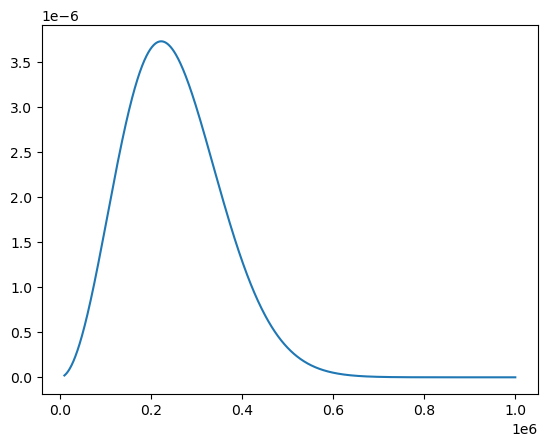

In [8]:
# plot the velocity distribution function (you don't need to make your plots look fancy)
plt.plot(v, fv)

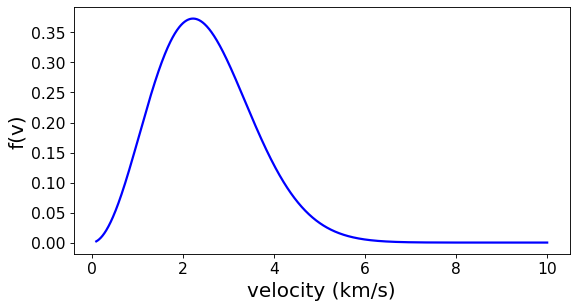

In [9]:
# plot once more making it look a bit nicer
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 4),dpi=80) # makes the figure display larger
# We can convert the velocity from cm/s to km/s by dividing by 1e5 to make the
# axis numbers look nicer, but then we should multiply f(v) by 1e5 to make the
# plotted integral sum to one.  Please beware of unit conversions.  The safest
# bet is to stick with cgs for all calculations and then make any adjustments
# you want only at the plotting stage.
plt.plot(v/1e5, fv*1e5, 'b', linewidth=2)
plt.xlabel('velocity (km/s)', size=18)
plt.ylabel('f(v)', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

Calculate the most likely velocity magnitude (using the expression from the notes)

In [10]:
c_s = np.sqrt(k*T/m) # sound speed
v_p = np.sqrt(2) * c_s # most probable speed

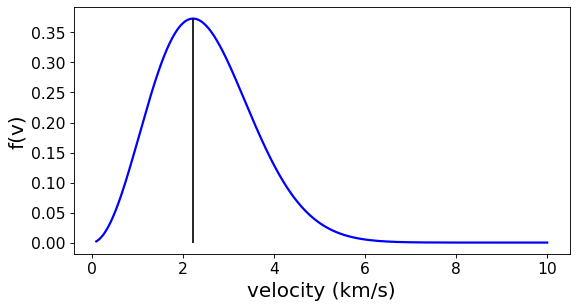

In [11]:
# if you've done this correctly, your most probable speed should
# line up with the peak of the plot
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 4),dpi=80)
plt.plot(v/1e5, fv*1e5, 'b', linewidth=2)

plt.vlines(v_p/1e5, 0, np.max(fv*1e5), colors='k') # this adds the vertical line

plt.xlabel('velocity (km/s)', size=18)
plt.ylabel('f(v)', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

Calculate the mean speed (using the expression from the notes)

In [14]:
v_m = np.sqrt(8/np.pi)*c_s # mean speed

In [15]:
# If you've done this correctly, your answer should match the mean
# calculated numerically here:
print('Mean velocity (cm/s):')
print(np.trapz(fv*v, v)) # numerical integration of v*f(v) over all v in the array
print(v_m)

Mean velocity (cm/s):
251064.8573221811
251065.38282188884


Calculate the RMS speed (using the expression from the notes)

In [16]:
v_rms = np.sqrt(3)*c_s # RMS speed

In [17]:
# If you've done this correctly, your answer should match the RMS
# calculated numerically here:
print('RMS velocity (cm/s):')
print(np.sqrt(np.trapz(fv*v**2, v))) # square root of the numerical integration of v^2*f(v) over all v in the array
print(v_rms)

RMS velocity (cm/s):
272506.8144388769
272506.83897910576


Calculate the isothermal sound speed (using the expression from the notes)

In [ ]:
#c_s =  # isothermal sound speed || Done above

In [18]:
# If you've done this correctly, these should match:
print('Isothermal sound speed (cm/s):')
print(v_rms/np.sqrt(3.0))
print(c_s)

Isothermal sound speed (cm/s):
157331.89684060073
157331.8968406007


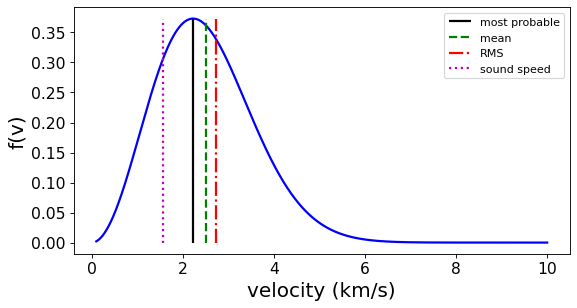

In [19]:
# Now overplot all of these velocity scales on the distribution function
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 4),dpi=80)

plt.plot(v/1e5,fv*1e5, 'b', linewidth=2)

plt.vlines(v_p/1e5, 0, np.max(fv*1e5), colors='k', linestyles='solid', linewidth=2, label='most probable')
plt.vlines(v_m/1e5, 0, np.max(fv*1e5), colors='g', linestyles='dashed', linewidth=2, label='mean')
plt.vlines(v_rms/1e5, 0, np.max(fv*1e5), colors='r', linestyles='dashdot', linewidth=2, label='RMS')
plt.vlines(c_s/1e5, 0, np.max(fv*1e5), colors='m', linestyles='dotted', linewidth=2, label='sound speed')
plt.legend()

plt.xlabel('velocity (km/s)', size=18)
plt.ylabel('f(v)', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

They velocities above should be different, but they should be a similar order-of-magnitude.

Now go back and try it with another temperature! (Your turned-in notebook only needs to have one temperature tried.)